# 라이브러리 불러오기

In [281]:
from glob import glob 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import folium

# 데이터 불러오기

In [282]:
glob('data/*.csv')

['data/test.csv', 'data/train.csv', 'data/sample_submission.csv']

In [283]:
train = pd.read_csv(glob('data/*.csv')[1])
test = pd.read_csv(glob('data/*.csv')[0])
submission = pd.read_csv(glob('data/*.csv')[2])

In [284]:
test = test.set_index('ID')
train = train.set_index('ID')
submission = submission.set_index('ID')

# 데이터 살펴보기

칼럼 설명
- ID : 샘플 별 고유 id
- Exercise_Duration  : 운동 시간(분)
- Body_Temperature(F) : 체온
- BPM : 심박수
- Height(Feet) : 키(피트)
- Height(Remainder_Inches) : 키(피트 계산 후 더해야 할 키)
- Weight(lb) : 몸무게(파운드)
- Weight_Status : 체중 상태
- Gender : 성별
- Age : 나이
- Calories_Burned : 칼로리 소모량(목표 예측값)

In [285]:
train.head()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
ID,,,,,,,,,,
TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0


## 결측치 확인

In [286]:
# 결측치 없음 
train.isnull().sum()

Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
Calories_Burned             0
dtype: int64

In [287]:
# 결측치 없음 
test.isnull().sum()

Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
dtype: int64

## 이상치 확인

In [288]:
train.describe()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age,Calories_Burned
count,7500.0000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.5012,104.033573,95.498133,5.248800,5.717600,165.361187,42.636000,89.373467
std,8.3553,1.412845,9.587331,0.556663,3.497315,33.308136,16.883188,62.817086
min,1.0000,98.800000,69.000000,4.000000,0.000000,79.400000,20.000000,1.000000
25%,8.0000,103.300000,88.000000,5.000000,3.000000,138.900000,28.000000,35.000000
50%,15.0000,104.400000,95.000000,5.000000,6.000000,163.100000,39.000000,77.000000
75%,23.0000,105.100000,103.000000,6.000000,9.000000,191.800000,56.000000,138.000000
max,30.0000,106.700000,128.000000,7.000000,12.000000,291.000000,79.000000,300.000000


In [289]:
train.describe(include='O')

,Weight_Status,Gender
count,7500,7500
unique,3,2
top,Normal Weight,F
freq,4681,3769


<Axes: >

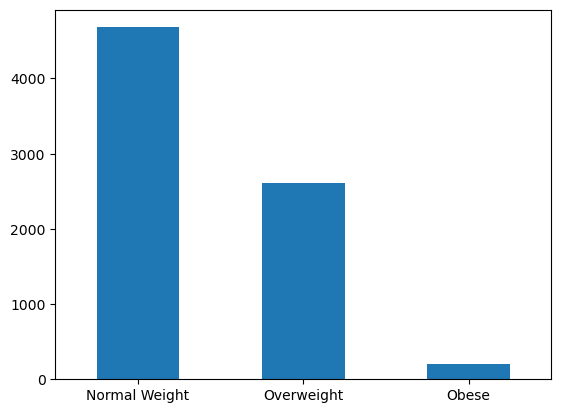

In [290]:
# Obese가 현저히 적음
train['Weight_Status'].value_counts().plot.bar(rot=0)

In [291]:
train['Weight_Status'].value_counts(1)

Normal Weight    0.624133
Overweight       0.348533
Obese            0.027333
Name: Weight_Status, dtype: float64

<Axes: >

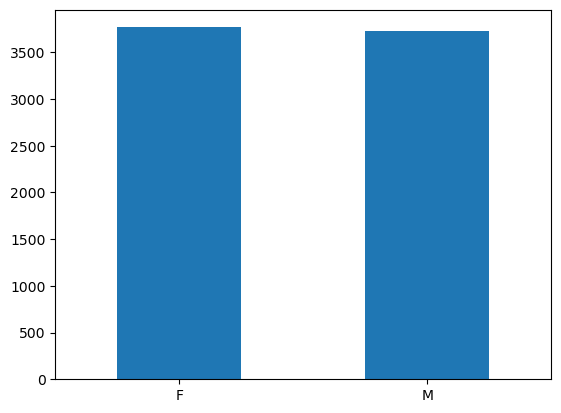

In [292]:
train['Gender'].value_counts().plot.bar(rot=0)

# 피처 엔지니어링

In [293]:
train.head(2)

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
ID,,,,,,,,,,
TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0


- 두 키 변수를 합해서 하나의 변수로 만들어 준다. 

In [294]:
# ft, inch column을 하나의 cm 컬럼으로 변경해줌 
train['Height(cm)'] = train['Height(Feet)'] * 30.48 + train['Height(Remainder_Inches)']*2.54
test['Height(cm)'] = test['Height(Feet)'] * 30.48 + test['Height(Remainder_Inches)']*2.54

In [295]:
# 기존 ft, inch column은 삭제 
train = train.drop(columns=['Height(Feet)','Height(Remainder_Inches)'])
test = test.drop(columns=['Height(Feet)','Height(Remainder_Inches)'])

- 몸무게와 몸의 온도를 kg, 섭씨로 바꿔준다. 

In [296]:
train['Weight(kg)'] = train['Weight(lb)'] * 0.45359237
test['Weight(kg)'] = test['Weight(lb)'] * 0.45359237

train['Body_Temperature(C)'] = (train['Body_Temperature(F)'] - 32)*(5/9)
test['Body_Temperature(C)'] = (test['Body_Temperature(F)'] - 32)*(5/9)

# drop
train = train.drop(columns=['Weight(lb)','Body_Temperature(F)'])
test = test.drop(columns=['Weight(lb)','Body_Temperature(F)'])

In [260]:
train

,Exercise_Duration,BPM,Weight_Status,Gender,Age,Calories_Burned,Height(cm),Weight(kg),Body_Temperature(C)
ID,,,,,,,,,
TRAIN_0000,26.0,107.0,Normal Weight,F,45,166.0,175.26,69.989303,40.888889
TRAIN_0001,7.0,88.0,Overweight,M,50,33.0,198.12,102.012924,39.611111
TRAIN_0002,7.0,86.0,Overweight,M,29,23.0,190.50,99.019214,39.611111
TRAIN_0003,17.0,99.0,Normal Weight,F,33,91.0,167.64,66.995593,40.000000
TRAIN_0004,9.0,88.0,Normal Weight,M,38,32.0,177.80,77.019984,39.277778
...,...,...,...,...,...,...,...,...,...
TRAIN_7495,22.0,104.0,Normal Weight,F,75,151.0,147.32,50.983782,40.611111
TRAIN_7496,20.0,104.0,Normal Weight,F,21,114.0,172.72,66.995593,40.722222
TRAIN_7497,8.0,90.0,Overweight,M,57,41.0,187.96,91.988533,39.500000


- 2가지 categorical value인 Gender와 Weight_status를 인코딩 해준다. 
- Gender는 비율이 50대 50이므로 label encoding 
- Weight_status 비율이 고르지 못하므로 One-Hot Encoding을 적용한다. 

In [300]:
# Label Encoding 
# Train 데이터 
train.loc[train['Gender'] == 'F', 'Gender'] = 0
train.loc[train['Gender'] == 'M', 'Gender'] = 1

# Test 데이터 
test.loc[test['Gender'] == 'F', 'Gender'] = 0
test.loc[test['Gender'] == 'M', 'Gender'] = 1

In [301]:
# dtype 변경해 주기 
train['Gender'] = train['Gender'].astype('int')
test['Gender'] = test['Gender'].astype('int')

In [302]:
train

,Exercise_Duration,BPM,Weight_Status,Gender,Age,Calories_Burned,Height(cm),Weight(kg),Body_Temperature(C)
ID,,,,,,,,,
TRAIN_0000,26.0,107.0,0,0,45,166.0,175.26,69.989303,40.888889
TRAIN_0001,7.0,88.0,1,1,50,33.0,198.12,102.012924,39.611111
TRAIN_0002,7.0,86.0,1,1,29,23.0,190.50,99.019214,39.611111
TRAIN_0003,17.0,99.0,0,0,33,91.0,167.64,66.995593,40.000000
TRAIN_0004,9.0,88.0,0,1,38,32.0,177.80,77.019984,39.277778
...,...,...,...,...,...,...,...,...,...
TRAIN_7495,22.0,104.0,0,0,75,151.0,147.32,50.983782,40.611111
TRAIN_7496,20.0,104.0,0,0,21,114.0,172.72,66.995593,40.722222
TRAIN_7497,8.0,90.0,1,1,57,41.0,187.96,91.988533,39.500000


In [303]:
# Label Encoding 
# Train 데이터 
train.loc[train['Weight_Status'] == 'Normal Weight', 'Weight_Status'] = 0
train.loc[train['Weight_Status'] == 'Overweight', 'Weight_Status'] = 1
train.loc[train['Weight_Status'] == 'Obese', 'Weight_Status'] = 2


# Test 데이터 
test.loc[test['Weight_Status'] == 'Normal Weight', 'Weight_Status'] = 0
test.loc[test['Weight_Status'] == 'Overweight', 'Weight_Status'] = 1
test.loc[test['Weight_Status'] == 'Obese', 'Weight_Status'] = 2


In [304]:
# dtype 변경해 주기 
train['Weight_Status'] = train['Weight_Status'].astype('int')
test['Weight_Status'] = test['Weight_Status'].astype('int')

In [305]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, TRAIN_0000 to TRAIN_7499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exercise_Duration    7500 non-null   float64
 1   BPM                  7500 non-null   float64
 2   Weight_Status        7500 non-null   int64  
 3   Gender               7500 non-null   int64  
 4   Age                  7500 non-null   int64  
 5   Calories_Burned      7500 non-null   float64
 6   Height(cm)           7500 non-null   float64
 7   Weight(kg)           7500 non-null   float64
 8   Body_Temperature(C)  7500 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 585.9+ KB


In [306]:
test.head(2)

,Exercise_Duration,BPM,Weight_Status,Gender,Age,Height(cm),Weight(kg),Body_Temperature(C)
ID,,,,,,,,
TEST_0000,26.0,107.0,0,0,45,154.94,51.981686,40.611111
TEST_0001,29.0,111.0,1,1,21,187.96,89.992726,40.500000


# 데이터 시각화

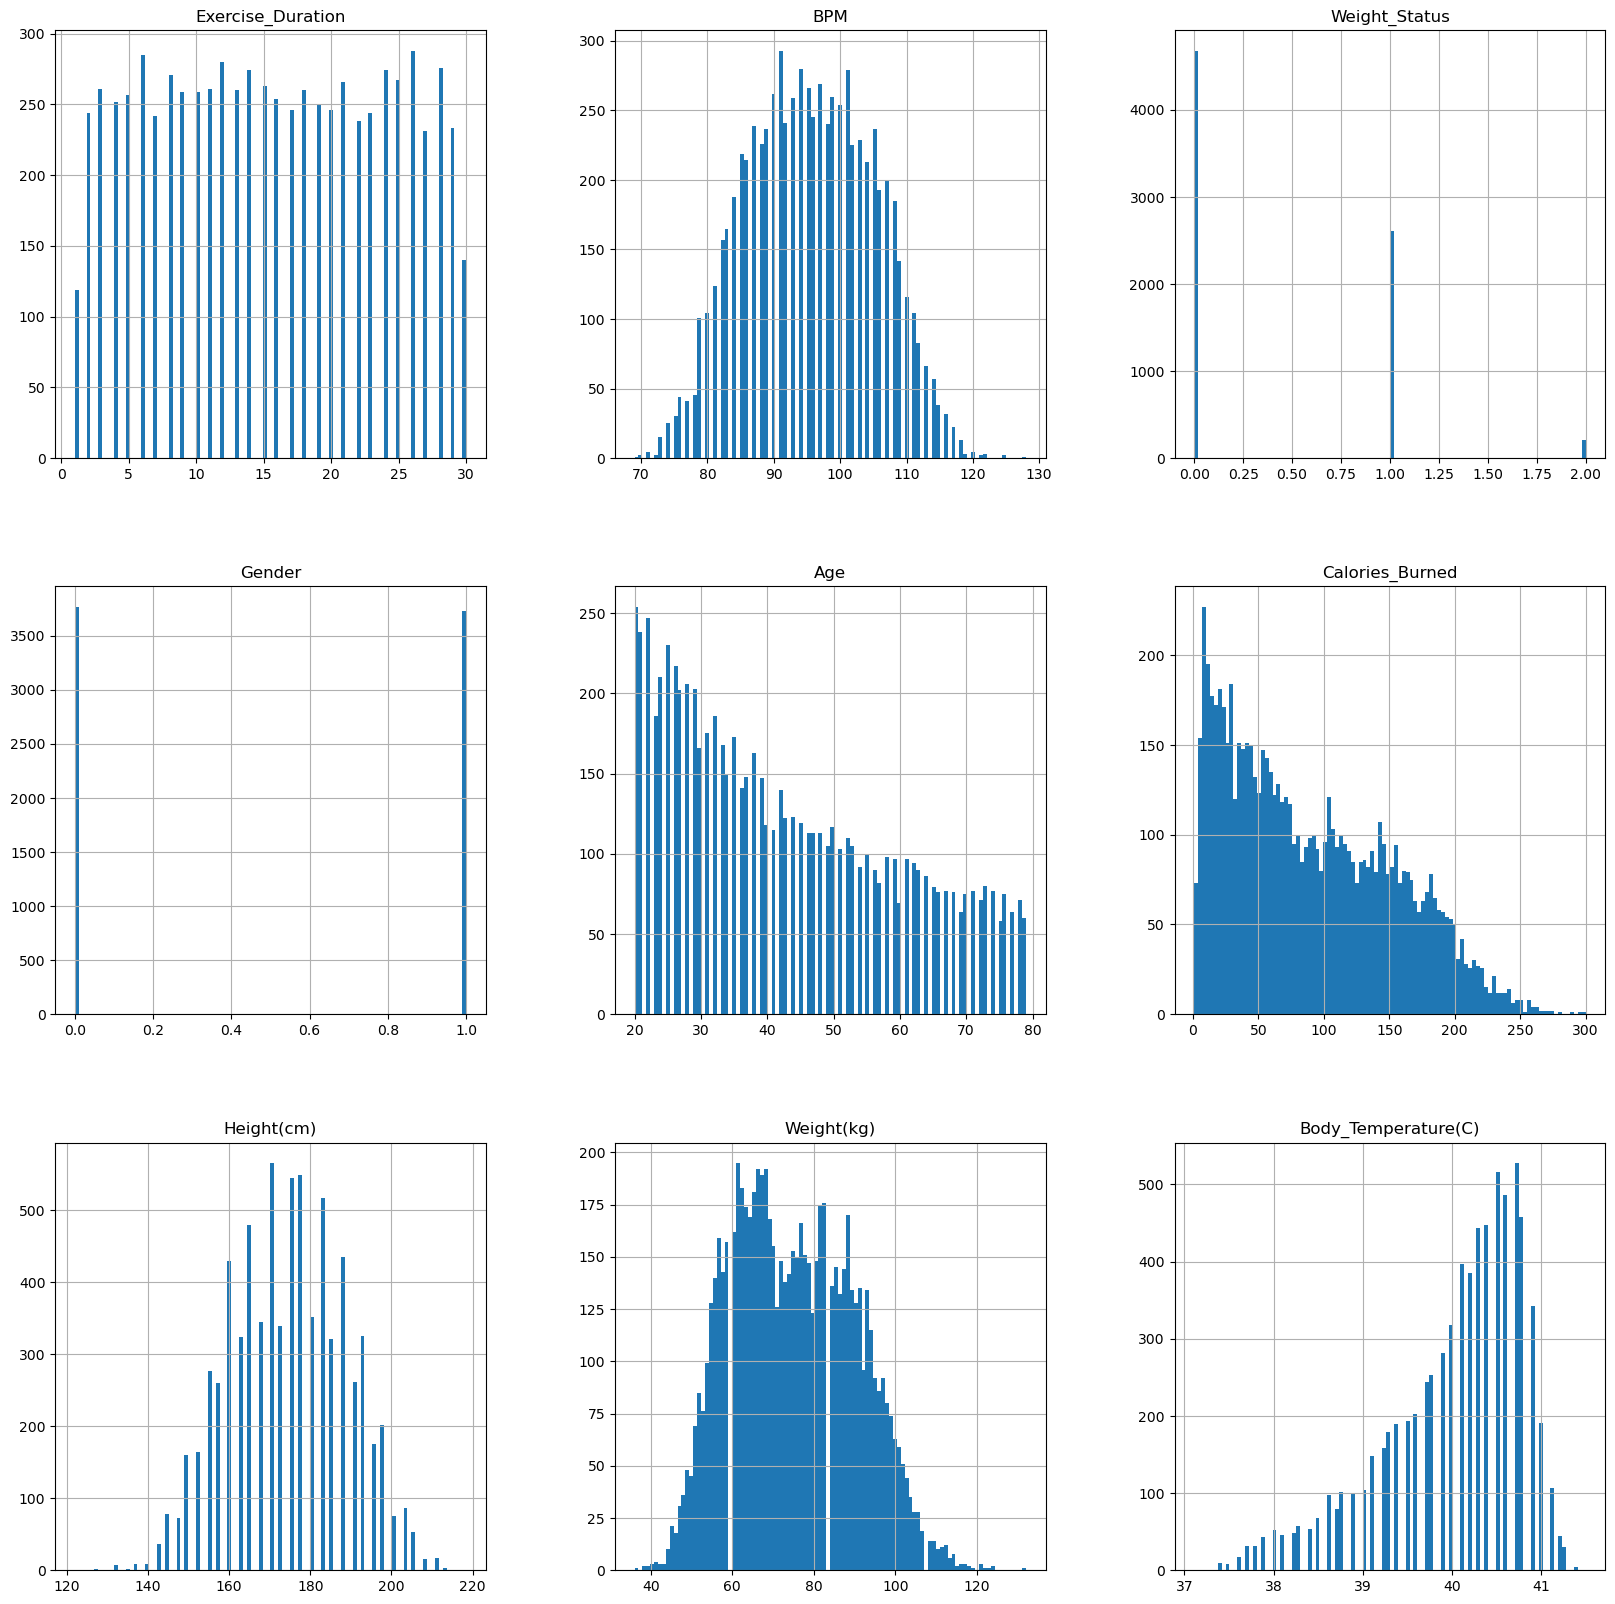

In [307]:
train.hist(bins=100,figsize=(20,20));

In [308]:
train['Body_Temperature(C)'].describe()

count    7500.000000
mean       40.018652
std         0.784914
min        37.111111
25%        39.611111
50%        40.222222
75%        40.611111
max        41.500000
Name: Body_Temperature(C), dtype: float64

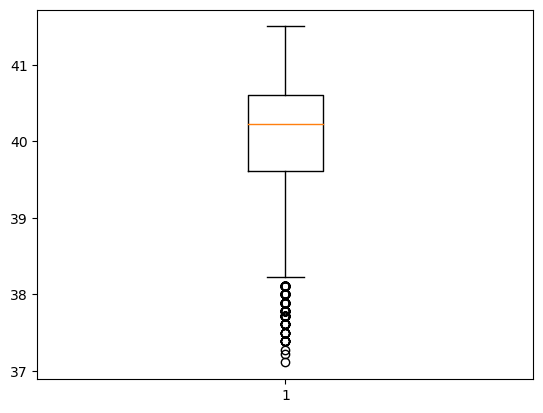

In [309]:
# 몇 개의 낮은 온도의 Outlier가 보입니다. 
plt.boxplot(train['Body_Temperature(C)']);

In [310]:
train['BPM'].describe()

count    7500.000000
mean       95.498133
std         9.587331
min        69.000000
25%        88.000000
50%        95.000000
75%       103.000000
max       128.000000
Name: BPM, dtype: float64

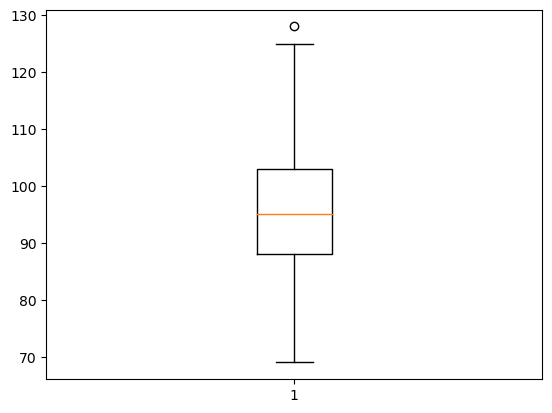

In [311]:
# 심박도 Outlier가 하나 있습니다. 
plt.boxplot(train['BPM']);

In [312]:
train['Weight(kg)'].describe()

count    7500.000000
mean       75.006573
std        15.108316
min        36.015234
25%        63.003980
50%        73.980916
75%        86.999017
max       131.995380
Name: Weight(kg), dtype: float64

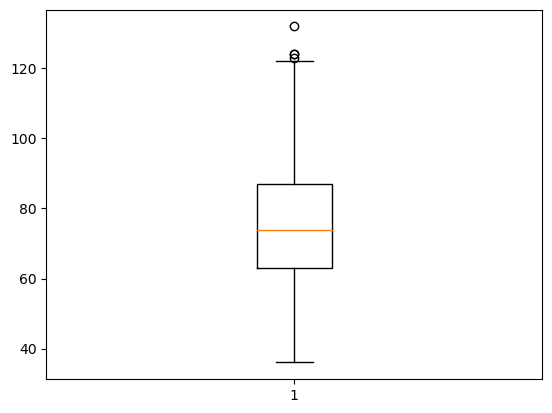

In [313]:
# 몇 개의 몸무게 outlier가 있습니다. 
plt.boxplot(train['Weight(kg)']);

In [314]:
train.describe()

,Exercise_Duration,BPM,Weight_Status,Gender,Age,Calories_Burned,Height(cm),Weight(kg),Body_Temperature(C)
count,7500.0000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.5012,95.498133,0.403200,0.497467,42.636000,89.373467,174.506128,75.006573,40.018652
std,8.3553,9.587331,0.543448,0.500027,16.883188,62.817086,14.318365,15.108316,0.784914
min,1.0000,69.000000,0.000000,0.000000,20.000000,1.000000,121.920000,36.015234,37.111111
25%,8.0000,88.000000,0.000000,0.000000,28.000000,35.000000,165.100000,63.003980,39.611111
50%,15.0000,95.000000,0.000000,0.000000,39.000000,77.000000,175.260000,73.980916,40.222222
75%,23.0000,103.000000,1.000000,1.000000,56.000000,138.000000,185.420000,86.999017,40.611111
max,30.0000,128.000000,2.000000,1.000000,79.000000,300.000000,218.440000,131.995380,41.500000


- bmi 공식 : BMI = kg/m2
- overweight은 BMI 25~30 사이 
- obese는 그 이상 

In [315]:
q1 = np.percentile(train['Weight(kg)'], 25)
q3 = np.percentile(train['Weight(kg)'], 75)
iqr = q3 - q1
weight_check = train.loc[train['Weight(kg)'] > q3 + iqr * 1.5,:].copy()
weight_check

,Exercise_Duration,BPM,Weight_Status,Gender,Age,Calories_Burned,Height(cm),Weight(kg),Body_Temperature(C)
ID,,,,,,,,,
TRAIN_1672,16.0,87.0,1,1,67,94.0,210.82,124.012154,40.111111
TRAIN_2227,1.0,88.0,1,1,40,5.0,218.44,131.995380,37.777778
TRAIN_2457,17.0,103.0,1,1,43,121.0,213.36,124.012154,40.722222
TRAIN_4889,25.0,103.0,1,1,74,215.0,210.82,123.014251,40.777778


In [316]:
# overweight 맞음. 키가 많이 커서 몸무게가 많이 나가도 상관 x 
weight_check['Weight(kg)']/np.square((weight_check['Height(cm)']/100))

ID
TRAIN_1672    27.902340
TRAIN_2227    27.662689
TRAIN_2457    27.241953
TRAIN_4889    27.677815
dtype: float64

# 다중공선성 확인

In [317]:
train.head(2)

,Exercise_Duration,BPM,Weight_Status,Gender,Age,Calories_Burned,Height(cm),Weight(kg),Body_Temperature(C)
ID,,,,,,,,,
TRAIN_0000,26.0,107.0,0,0,45,166.0,175.26,69.989303,40.888889
TRAIN_0001,7.0,88.0,1,1,50,33.0,198.12,102.012924,39.611111


In [318]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수 분리
X = train.drop(columns=['Calories_Burned'])

# VIF 계산

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

print(vif)

    VIF Factor             features
0    14.261929    Exercise_Duration
1   362.136936                  BPM
2     3.310324        Weight_Status
3     5.602394               Gender
4     8.206812                  Age
5  2707.578384           Height(cm)
6   655.173434           Weight(kg)
7  1238.959720  Body_Temperature(C)


- one hot encoding이 아닌 label encoding의 방식으로 접근해야겠음

## 전체 분포 확인

<Axes: >

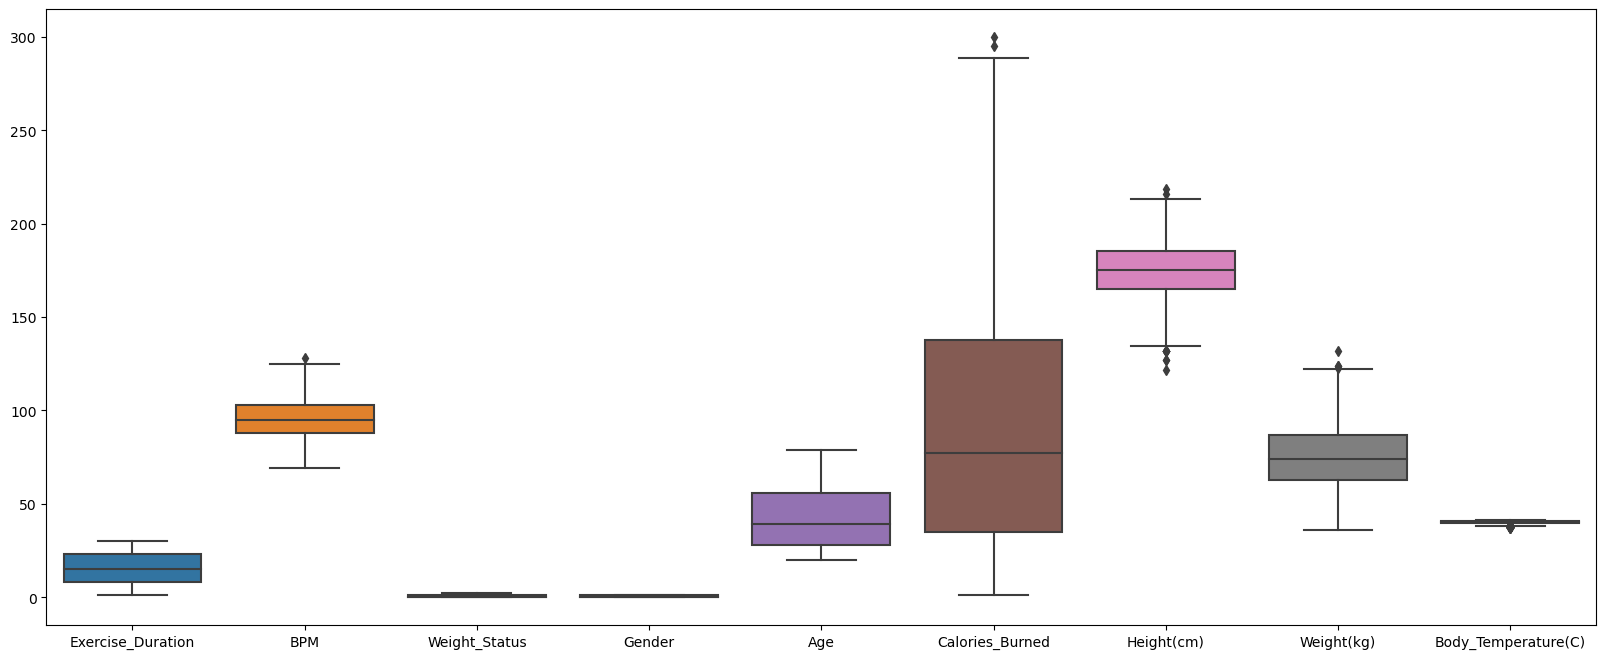

In [319]:
# 인코딩을 한 값을 제외하면 분포가 고르지 않은 걸 확인할 수 있다. 
plt.figure(figsize=(20,8))
sns.boxplot(train)

In [320]:
train.columns

Index(['Exercise_Duration', 'BPM', 'Weight_Status', 'Gender', 'Age',
       'Calories_Burned', 'Height(cm)', 'Weight(kg)', 'Body_Temperature(C)'],
      dtype='object')

In [322]:
# scaling 적용 
temp = train[['Exercise_Duration', 'BPM', 'Age', 'Calories_Burned',
       'Height(cm)', 'Weight(kg)', 'Body_Temperature(C)']]

train_scaled = (temp - temp.mean()) /temp.std()


<Axes: >

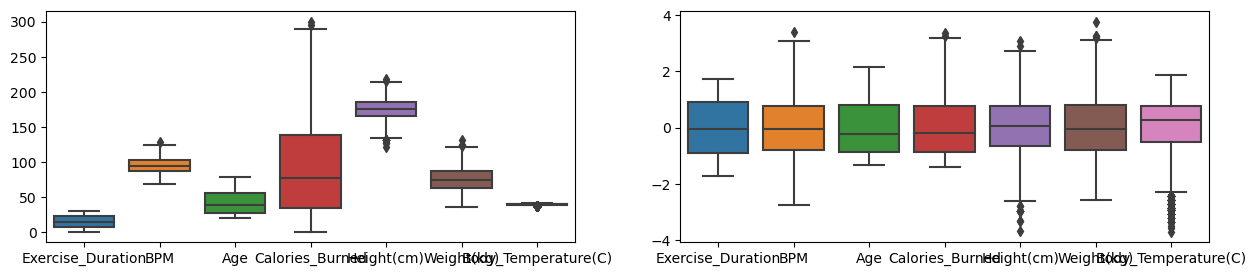

In [323]:
# 분포가 고르게 됨 
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
sns.boxplot(temp, ax=axes[0])
sns.boxplot(train_scaled, ax=axes[1])

In [220]:
# train[['Exercise_Duration', 
#        'BPM',
#        'Age',
#        'Calories_Burned',
#        'Height(cm)',
#        'Weight(kg)',
#        'Body_Temperature(C)']] = train_scaled


In [221]:
# 스케일링 적용 후
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수 분리
X = train[['Exercise_Duration', 'Age', 'Height(cm)', 'Weight(kg)', 'BPM', 'Body_Temperature(C)']]

# VIF 계산

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

print(vif)

    VIF Factor             features
0    13.945215    Exercise_Duration
1     7.950939                  Age
2  1847.846370           Height(cm)
3   321.821776           Weight(kg)
4   362.015064                  BPM
5  1041.296584  Body_Temperature(C)


## 상관계수 분석

In [222]:
# 인코딩된 컬럼을 제외하고 상관계수 분석 
correlation = train[['Exercise_Duration', 'BPM', 'Age','Height(cm)',
                     'Weight(kg)', 'Body_Temperature(C)', 'Calories_Burned']].corr()

<Axes: >

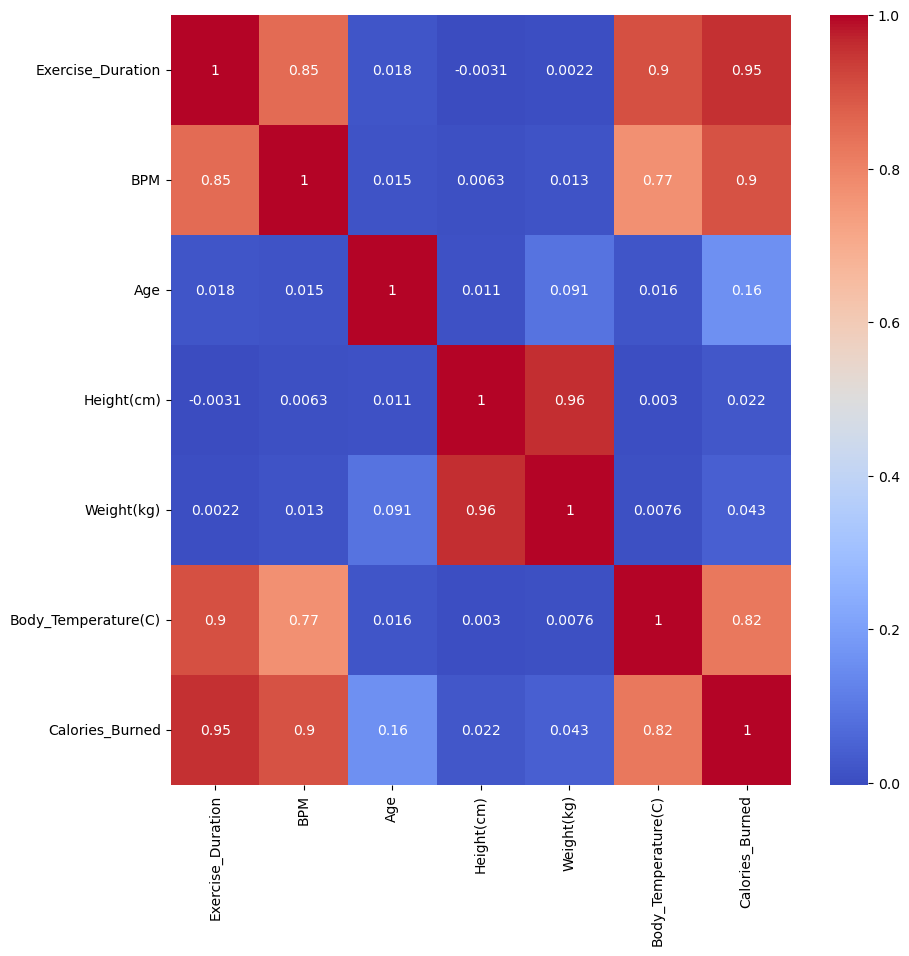

In [223]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

## 머신러닝 - Catboost 

In [224]:
X = train.drop(columns=['Calories_Burned'])
y = train['Calories_Burned']

In [225]:
# from sklearn.model_selection import train_test_split

# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

In [233]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(loss_function='RMSE', 
                          depth=6, 
                          iterations=1000, 
                          l2_leaf_reg=1, 
                          learning_rate=0.1) 

In [229]:
# from catboost import CatBoostRegressor

# model = CatBoostRegressor(loss_function='RMSE') 

In [230]:
grid = {'iterations': [100, 500, 1000],
        'learning_rate': [0.01, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

In [234]:
# # cv_result 에서 rank 를 일관되게 표현할 수 있습니다. 
# from sklearn.model_selection import GridSearchCV

# reg = GridSearchCV(model, grid, n_jobs=-1, cv=3, verbose=2, 
#                    scoring="neg_root_mean_squared_error")
# reg.fit(X, y)

In [235]:
pd.DataFrame(reg.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_iterations,param_l2_leaf_reg,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
69,1.396520,0.107138,0.017648,0.007924,6,1000,1,0.1,"{'depth': 6, 'iterations': 1000, 'l2_leaf_reg'...",-1.144152,-0.877527,-0.882134,-0.967938,0.124617,1
67,1.400267,0.032737,0.009938,0.002474,6,1000,0.5,0.1,"{'depth': 6, 'iterations': 1000, 'l2_leaf_reg'...",-1.190739,-0.858776,-0.867378,-0.972298,0.154501,2
65,1.575536,0.081296,0.016370,0.005105,6,1000,0.2,0.1,"{'depth': 6, 'iterations': 1000, 'l2_leaf_reg'...",-1.211474,-0.859778,-0.873232,-0.981495,0.162713,3
71,1.503448,0.046444,0.023887,0.010749,6,1000,3,0.1,"{'depth': 6, 'iterations': 1000, 'l2_leaf_reg'...",-1.149547,-0.924546,-0.897071,-0.990388,0.113100,4
43,0.943493,0.036469,0.026712,0.002782,4,1000,0.5,0.1,"{'depth': 4, 'iterations': 1000, 'l2_leaf_reg'...",-1.179195,-0.993886,-0.980234,-1.051105,0.090745,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,0.123313,0.027226,0.014321,0.003583,4,100,3,0.01,"{'depth': 4, 'iterations': 100, 'l2_leaf_reg':...",-28.350447,-27.121206,-28.026360,-27.832671,0.520189,92
0,0.134144,0.010117,0.010729,0.001011,2,100,0.2,0.01,"{'depth': 2, 'iterations': 100, 'l2_leaf_reg':...",-31.496843,-30.091297,-31.112195,-30.900112,0.593085,93
4,0.076554,0.006184,0.007980,0.001905,2,100,1,0.01,"{'depth': 2, 'iterations': 100, 'l2_leaf_reg':...",-31.501992,-30.099438,-31.108407,-30.903279,0.590676,94
2,0.101024,0.005311,0.016624,0.004660,2,100,0.5,0.01,"{'depth': 2, 'iterations': 100, 'l2_leaf_reg':...",-31.543897,-30.093011,-31.101676,-30.912861,0.607182,95


In [236]:
train

,Exercise_Duration,BPM,Gender,Age,Calories_Burned,Height(cm),Weight(kg),Body_Temperature(C),Weight_Status_Normal Weight,Weight_Status_Obese,Weight_Status_Overweight
ID,,,,,,,,,,,
TRAIN_0000,26.0,107.0,0,45,166.0,175.26,69.989303,40.888889,1,0,0
TRAIN_0001,7.0,88.0,1,50,33.0,198.12,102.012924,39.611111,0,0,1
TRAIN_0002,7.0,86.0,1,29,23.0,190.50,99.019214,39.611111,0,0,1
TRAIN_0003,17.0,99.0,0,33,91.0,167.64,66.995593,40.000000,1,0,0
TRAIN_0004,9.0,88.0,1,38,32.0,177.80,77.019984,39.277778,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_7495,22.0,104.0,0,75,151.0,147.32,50.983782,40.611111,1,0,0
TRAIN_7496,20.0,104.0,0,21,114.0,172.72,66.995593,40.722222,1,0,0
TRAIN_7497,8.0,90.0,1,57,41.0,187.96,91.988533,39.500000,0,0,1


In [237]:
best_model = reg.best_estimator_
best_model

In [238]:
abs(reg.best_score_)

0.9679377530102372

In [239]:
reg.best_estimator_

In [240]:
y_pred = model.fit(X, y).predict(test)

0:	learn: 57.1586601	total: 2.72ms	remaining: 2.72s
1:	learn: 52.1092477	total: 4.71ms	remaining: 2.35s
2:	learn: 47.6474051	total: 6.11ms	remaining: 2.03s
3:	learn: 43.5228002	total: 7.17ms	remaining: 1.79s
4:	learn: 39.8609499	total: 8.27ms	remaining: 1.64s
5:	learn: 36.4562027	total: 9.29ms	remaining: 1.54s
6:	learn: 33.3626169	total: 11.1ms	remaining: 1.57s
7:	learn: 30.5012925	total: 12.1ms	remaining: 1.5s
8:	learn: 27.8622898	total: 13.2ms	remaining: 1.45s
9:	learn: 25.5376134	total: 14.3ms	remaining: 1.42s
10:	learn: 23.4750366	total: 15.2ms	remaining: 1.37s
11:	learn: 21.5653743	total: 16.1ms	remaining: 1.33s
12:	learn: 19.8885891	total: 17.2ms	remaining: 1.31s
13:	learn: 18.3169360	total: 18.3ms	remaining: 1.28s
14:	learn: 16.9942624	total: 19.1ms	remaining: 1.26s
15:	learn: 15.7749544	total: 20.1ms	remaining: 1.24s
16:	learn: 14.6798474	total: 21.3ms	remaining: 1.23s
17:	learn: 13.6346242	total: 22.2ms	remaining: 1.21s
18:	learn: 12.7053983	total: 23.2ms	remaining: 1.2s
19:	l

183:	learn: 1.3928286	total: 198ms	remaining: 880ms
184:	learn: 1.3849571	total: 200ms	remaining: 879ms
185:	learn: 1.3788877	total: 201ms	remaining: 880ms
186:	learn: 1.3718249	total: 202ms	remaining: 878ms
187:	learn: 1.3670823	total: 203ms	remaining: 877ms
188:	learn: 1.3620422	total: 204ms	remaining: 875ms
189:	learn: 1.3564692	total: 205ms	remaining: 874ms
190:	learn: 1.3526783	total: 206ms	remaining: 873ms
191:	learn: 1.3445067	total: 208ms	remaining: 873ms
192:	learn: 1.3371653	total: 208ms	remaining: 872ms
193:	learn: 1.3329945	total: 210ms	remaining: 871ms
194:	learn: 1.3234079	total: 211ms	remaining: 869ms
195:	learn: 1.3185652	total: 212ms	remaining: 868ms
196:	learn: 1.3119266	total: 212ms	remaining: 866ms
197:	learn: 1.3074491	total: 214ms	remaining: 865ms
198:	learn: 1.2987960	total: 215ms	remaining: 864ms
199:	learn: 1.2932565	total: 216ms	remaining: 863ms
200:	learn: 1.2861769	total: 217ms	remaining: 862ms
201:	learn: 1.2807561	total: 218ms	remaining: 861ms
202:	learn: 

364:	learn: 0.7969569	total: 395ms	remaining: 687ms
365:	learn: 0.7953481	total: 396ms	remaining: 686ms
366:	learn: 0.7938963	total: 397ms	remaining: 685ms
367:	learn: 0.7916785	total: 398ms	remaining: 683ms
368:	learn: 0.7891543	total: 399ms	remaining: 683ms
369:	learn: 0.7872215	total: 400ms	remaining: 681ms
370:	learn: 0.7851819	total: 401ms	remaining: 680ms
371:	learn: 0.7835983	total: 402ms	remaining: 679ms
372:	learn: 0.7824477	total: 403ms	remaining: 678ms
373:	learn: 0.7817674	total: 404ms	remaining: 676ms
374:	learn: 0.7806191	total: 405ms	remaining: 675ms
375:	learn: 0.7788591	total: 406ms	remaining: 674ms
376:	learn: 0.7774567	total: 407ms	remaining: 673ms
377:	learn: 0.7759632	total: 408ms	remaining: 672ms
378:	learn: 0.7744359	total: 409ms	remaining: 671ms
379:	learn: 0.7728542	total: 411ms	remaining: 670ms
380:	learn: 0.7717577	total: 412ms	remaining: 669ms
381:	learn: 0.7709996	total: 413ms	remaining: 668ms
382:	learn: 0.7697501	total: 414ms	remaining: 667ms
383:	learn: 

548:	learn: 0.5931648	total: 591ms	remaining: 485ms
549:	learn: 0.5921865	total: 592ms	remaining: 484ms
550:	learn: 0.5918578	total: 593ms	remaining: 483ms
551:	learn: 0.5909502	total: 594ms	remaining: 482ms
552:	learn: 0.5902529	total: 595ms	remaining: 481ms
553:	learn: 0.5895472	total: 596ms	remaining: 480ms
554:	learn: 0.5887623	total: 597ms	remaining: 478ms
555:	learn: 0.5880672	total: 597ms	remaining: 477ms
556:	learn: 0.5874845	total: 598ms	remaining: 476ms
557:	learn: 0.5873295	total: 600ms	remaining: 475ms
558:	learn: 0.5867654	total: 601ms	remaining: 474ms
559:	learn: 0.5863941	total: 602ms	remaining: 473ms
560:	learn: 0.5856350	total: 603ms	remaining: 472ms
561:	learn: 0.5848068	total: 604ms	remaining: 471ms
562:	learn: 0.5842197	total: 605ms	remaining: 470ms
563:	learn: 0.5838512	total: 606ms	remaining: 469ms
564:	learn: 0.5830856	total: 607ms	remaining: 468ms
565:	learn: 0.5820665	total: 608ms	remaining: 467ms
566:	learn: 0.5811628	total: 610ms	remaining: 466ms
567:	learn: 

731:	learn: 0.4923552	total: 787ms	remaining: 288ms
732:	learn: 0.4921581	total: 788ms	remaining: 287ms
733:	learn: 0.4916152	total: 789ms	remaining: 286ms
734:	learn: 0.4912197	total: 790ms	remaining: 285ms
735:	learn: 0.4911489	total: 791ms	remaining: 284ms
736:	learn: 0.4908017	total: 792ms	remaining: 283ms
737:	learn: 0.4902580	total: 793ms	remaining: 282ms
738:	learn: 0.4896935	total: 794ms	remaining: 280ms
739:	learn: 0.4892813	total: 795ms	remaining: 279ms
740:	learn: 0.4886376	total: 796ms	remaining: 278ms
741:	learn: 0.4881474	total: 797ms	remaining: 277ms
742:	learn: 0.4874851	total: 799ms	remaining: 276ms
743:	learn: 0.4871927	total: 800ms	remaining: 275ms
744:	learn: 0.4870154	total: 801ms	remaining: 274ms
745:	learn: 0.4868039	total: 802ms	remaining: 273ms
746:	learn: 0.4863191	total: 803ms	remaining: 272ms
747:	learn: 0.4859156	total: 804ms	remaining: 271ms
748:	learn: 0.4853025	total: 805ms	remaining: 270ms
749:	learn: 0.4848226	total: 806ms	remaining: 269ms
750:	learn: 

916:	learn: 0.4261795	total: 983ms	remaining: 89ms
917:	learn: 0.4258948	total: 985ms	remaining: 88ms
918:	learn: 0.4254561	total: 986ms	remaining: 86.9ms
919:	learn: 0.4251069	total: 986ms	remaining: 85.8ms
920:	learn: 0.4247859	total: 988ms	remaining: 84.7ms
921:	learn: 0.4243431	total: 990ms	remaining: 83.7ms
922:	learn: 0.4241900	total: 992ms	remaining: 82.7ms
923:	learn: 0.4239791	total: 993ms	remaining: 81.7ms
924:	learn: 0.4235486	total: 995ms	remaining: 80.7ms
925:	learn: 0.4232650	total: 996ms	remaining: 79.6ms
926:	learn: 0.4228817	total: 998ms	remaining: 78.6ms
927:	learn: 0.4224950	total: 998ms	remaining: 77.5ms
928:	learn: 0.4222063	total: 1000ms	remaining: 76.4ms
929:	learn: 0.4218244	total: 1s	remaining: 75.3ms
930:	learn: 0.4215755	total: 1s	remaining: 74.2ms
931:	learn: 0.4213411	total: 1s	remaining: 73.1ms
932:	learn: 0.4208970	total: 1s	remaining: 72.1ms
933:	learn: 0.4206163	total: 1s	remaining: 71ms
934:	learn: 0.4204905	total: 1s	remaining: 69.9ms
935:	learn: 0.42

<Axes: >

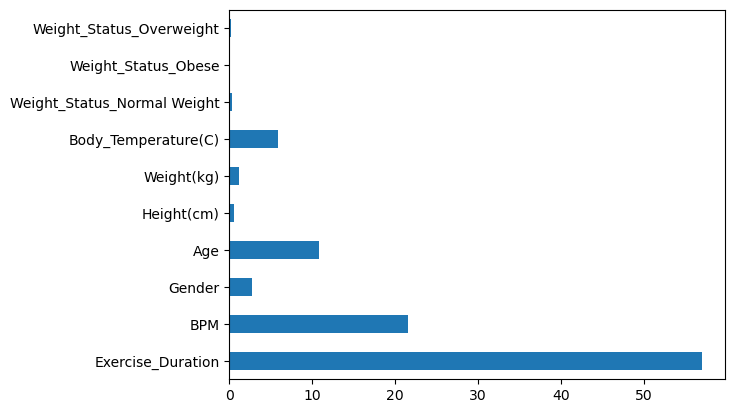

In [241]:
fi = pd.Series(model.feature_importances_)
fi.index = model.feature_names_
fi.plot.barh()

In [242]:
submission['Calories_Burned'] = y_pred

In [243]:
submission.to_csv('the_calorie_3차_catboost_gridsearch.csv')